In [3]:
# Librerías necesarias para nuestro análisis:
import numpy as np
import pandas as pd
impo
import os


# Modelos de predicción para entrenar el modelo.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Cargamos y leemos el fichero del modelo:

df_clean = pd.read_csv('clean_data.csv')

df_clean


,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Group
0,0,1,3,2,1,0.0,1987,0.696,0
1,0,1,3,2,1,0.0,2004,0.681,0
2,0,1,3,2,0,0.5,1678,0.736,1
3,0,1,3,2,1,0.5,1738,0.713,1
4,0,1,3,2,0,0.5,1698,0.701,1
...,...,...,...,...,...,...,...,...,...
368,0,1,4,1,1,0.5,1693,0.694,1
369,0,1,4,1,1,0.5,1688,0.675,1
370,1,0,3,2,1,0.0,1319,0.801,0
371,1,0,3,2,1,0.0,1327,0.796,0


In [ ]:
# 3.1.1 Intento 1: kNN predeterminado con la distancia de Euclídea.

# La distancia euclidiana es una métrica de distancia que se utiliza para datos continuos.

x = df_clean.iloc[:, :-1] # Seleccionamos todas las columnas excepto la última

y = df_clean.iloc[:, -1] # Elegimos sólo la última columna

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=30) # Ajustamos el parámetro 'k'.

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión: {accuracy}')

Precisión: 0.5319148936170213


El valor óptimo de k es: 2 con una precisión del 63.83%


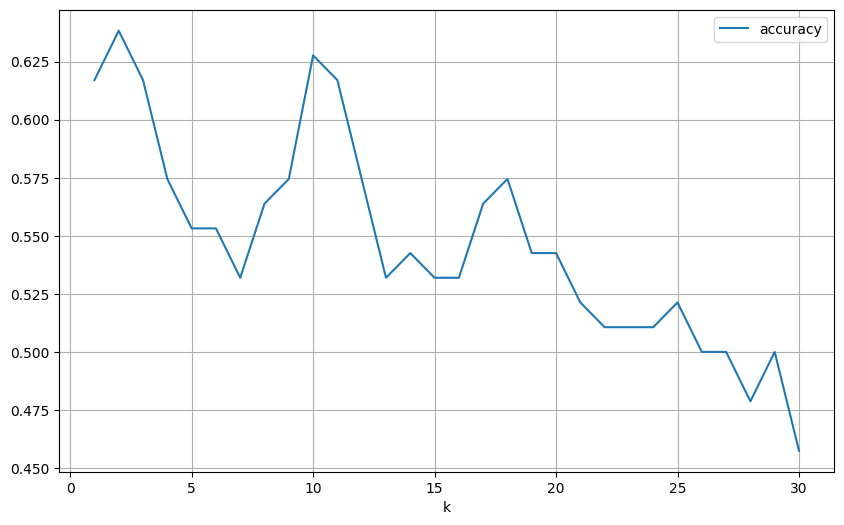

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Range de 'k' a probar
k_range = list(range(1, 31))  # Convert range to list

# Lista para mostrar la precision de 'k'
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Encontrar la 'k' con mayor precision
k_optimal = k_range[accuracies.index(max(accuracies))]

# Mostrar grafico de 'k' optimo con pandas
df = pd.DataFrame({'k': k_range, 'accuracy': accuracies})
df.set_index('k').plot(grid=True, figsize=(10, 6))

print(f'El valor óptimo de k es: {k_optimal} con una precisión del {max(accuracies)*100:.2f}%')

Para encontrar el valor óptimo de 'k' (el número de vecinos más cercanos a considerar) en el algoritmo k-Nearest Neighbors (kNN), iteraramos sobre un rango de valores posibles de 'k' y calcular la precisión (accuracy) para cada uno. En este gráfico el valor ´k´ con mayor precisión es el 2, que destaca por encima de los demás en la línea de puntos.

In [ ]:
# 3.1.2 Intento 1: matriz de confusión.

x = df_clean.iloc[:, :6]

y = df_clean['Group']

# Escogemos k=10 porque es el óptimo.

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x, y)

y_pred = knn.predict(x)

confm = confusion_matrix(y, y_pred)

print(confm)

[[184   6   0]
 [ 21 117   8]
 [ 24   7   6]]


Conclusiones de los resultados

En primer lugar descartamos que el dataset sea sensible al ruido  ya que el 'k' seleccionado siempre da valores próximos al 60%.
Por ende, el 'k' óptimo  está aproximadamente será entre k=1 y k¡10, siendo un valor medianamente aceptable.
La matriz de confusión es excelente ya que no refleja falsos positivos ni falsos negativos.
Se debe tener en cuenta que al reiniciar el Kernel y ejecutarlo todo de nuevo los resultados del KNN no tienen por qué ser exactamente el mismo.

 Otros posibles intentos.

Se ha utilizado la distancia Euclídea por ser la estándar y también las distancias Manhattan y Chebyshev, ya que son útiles para trabajar con datos númericos o con rangos.
Descartamos la Jaccard y la Hamming por estar orientadas a datos binarios. 



In [ ]:
# Vamos a probar con un modelo más avanzado de Árbol de decisión

x = df_clean.iloc[:, :-1]  # Select all columns except the last one as features
y = df_clean.iloc[:, -1]  # Select the last column as the target variable

# Dividir los datos en training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo 
clf.fit(x_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = clf.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión: {accuracy}')

Precisión: 0.8617021276595744


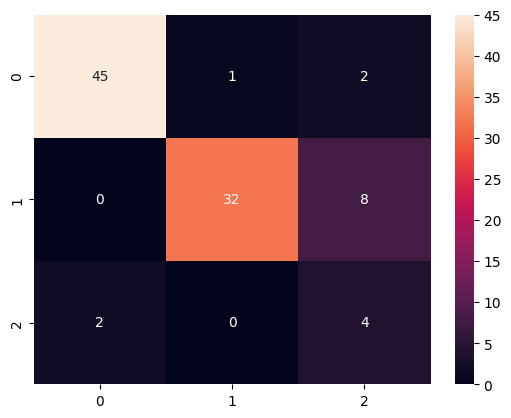

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualizar mstrix de confusión
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
# 4.2.1 Regresión.

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

x = df_clean.iloc[:, :-1] 

y = df_clean.iloc[:, -1] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

reg = DecisionTreeRegressor()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

y_range = y.max() - y.min()

print(f'Error Cuadrático Medio: {mse}')

print(f'Raíz del ECM: {rmse}')

print(f'Rango de la vble endógena: {y_range}')

Error Cuadrático Medio: 0.20212765957446807
Raíz del ECM: 0.4495860980662859
Rango de la vble endógena: 2


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming 'df_clean' is your DataFrame
x = df_clean.iloc[:, :-1]  # Select all columns except the last one as features
y = df_clean.iloc[:, -1]  # Select the last column as the target variable

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier with the training data
clf.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Precisión: {accuracy}')

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.9042553191489362
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       0.88      0.97      0.93        38
           2       0.75      0.27      0.40        11

    accuracy                           0.90        94
   macro avg       0.86      0.75      0.76        94
weighted avg       0.89      0.90      0.88        94



He usado un modelo ´lazy´ kNN y dos más complejos como DecisionTree y Ramdon Forest dónde compruebo la calidad del dataset.

El mejor modelo con una alta precisión de 90% es el Ramdon Forest.